The primary objective of this analysis was to empirically test the validity of this approach by mapping the distribution of ESG scores across the 11 sectors within the S&P 500. Specifically, the study aimed to determine whether high ESG ratings are exclusively the domain of low-emission industries or if significant variance exists within "brown" sectors, thereby justifying a "best in class" selection strategy over negative screening.
Moving beyond simple sectoral averages, the analysis focuses on testing the hypothesis that high ESG firms exhibit lower short term market volatility, and identifying "Value" opportunities by screening for companies with superior sustainability ratings trading at discounted valuations.

/tmp/ipython-input-1923453772.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_analysis, x="mean_rating", y="Sector", palette="viridis")


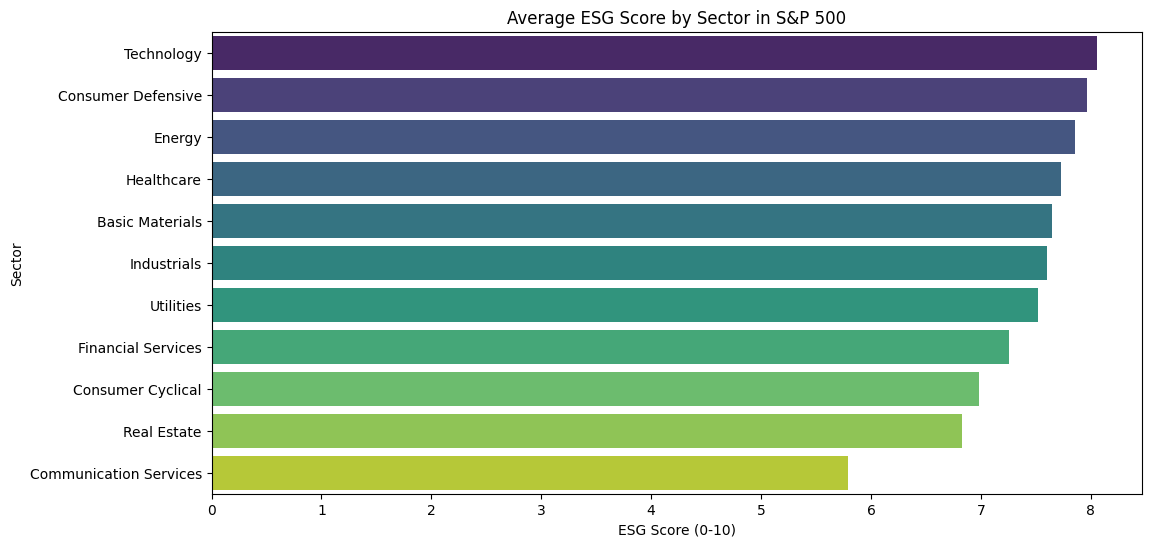

la correlazione tra lo score ESG e la volatilità a 30 giorni è:  -0.09341326169257505


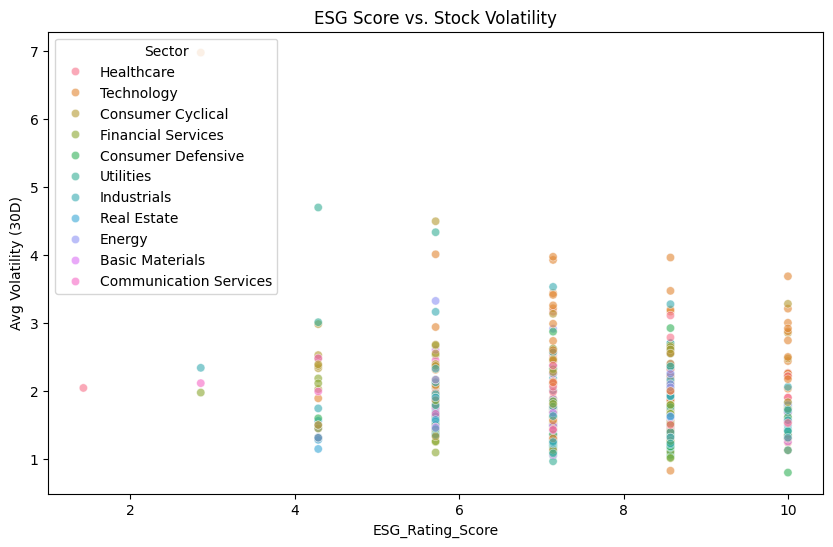

Top 5 Undervalued ESG Leaders:
    Symbol                    Description              Sector  P/E Ratio  \
14     AES                       AES Corp           Utilities       6.04   
369    PHM                 Pultegroup Inc   Consumer Cyclical       7.44   
424    SYF            Synchrony Financial  Financial Services       8.24   
224    HPE  Hewlett Packard Enterprise Co          Technology       8.51   
177   FANG         Diamondback Energy Inc              Energy       8.94   

     ESG_Rating_Score  
14              8.571  
369             8.571  
424             8.571  
224            10.000  
177             8.571  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/content/esg_financial_dataset_with_sector.csv")
df_clean = df.dropna(subset=["ESG_Rating_Score", "P/E Ratio"])
df_clean = df_clean[(df_clean["P/E Ratio"] < 200) & (df_clean["P/E Ratio"] > 0)]

sector_analysis = df_clean.groupby("Sector").agg(
    mean_rating=("ESG_Rating_Score", "mean"),
    median_PE=("P/E Ratio", "median")
)

sector_analysis = sector_analysis.sort_values("mean_rating", ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sector_analysis, x="mean_rating", y="Sector", palette="viridis")
plt.title("Average ESG Score by Sector in S&P 500")
plt.xlabel("ESG Score (0-10)")
plt.show()

correlation = df_clean["ESG_Rating_Score"].corr(df_clean["Avg Volatility (30D)"])
print("la correlazione tra lo score ESG e la volatilità a 30 giorni è: ", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="ESG_Rating_Score", y="Avg Volatility (30D)", hue="Sector", alpha=0.6)
plt.title("ESG Score vs. Stock Volatility")
plt.show()

opportunities = df_clean[(df_clean["ESG_Rating_Score"] >= 7.5) & (df_clean["P/E Ratio"] < 20)]
opportunities = opportunities.sort_values("P/E Ratio",ascending = True)
opportunities = opportunities[["Symbol", "Description", "Sector", "P/E Ratio", "ESG_Rating_Score"]]

print("Top 5 Undervalued ESG Leaders:")
print(opportunities.head())


The data reveals a negative correlation of -0.09 between ESG scores and 30-day price volatility. While the coefficient indicates a weak linear relationship, the directional trend suggests that superior sustainability ratings serve as a valid proxy for lower risk, acting as a "quality factor" during market turbulence.
Furthermore, while the Technology sector leads in average scores, the analysis dispels the myth that "brown" sectors are uninvestable. Significant variance exists within the Energy and Utilities sectors, validating a "best-in-class" selection approach over negative screening.
Finally, by applying a rigorous "High ESG / Low Valuation" filter, the algorithm identified distinct undervalued opportunities. Notably, Hewlett Packard Enterprise (HPE) emerged as the top performer with a perfect ESG score of 10.0 while trading at a deep discount of 8.5x P/E. Similarly, AES Corp demonstrated that defensive sectors can offer both stability and sustainability at a low cost, and Diamondback Energy proved that high-scoring assets exist even within the Energy sector, challenging traditional divestment strategies.